### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [15]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.cov(numeric_only = True)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,366.894325,-0.186024,0.0,-1.476417,-1.341876,0.763692,-0.763692,0.581017
has_children,-0.186024,0.242648,0.0,0.019118,-0.002190,-0.006397,0.006397,-0.011115
toCoupon_GEQ5min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
toCoupon_GEQ15min,-1.476417,0.019118,0.0,0.246238,0.052242,-0.061855,0.061855,-0.020057
toCoupon_GEQ25min,-1.341876,-0.002190,0.0,0.052242,0.104944,-0.025585,0.025585,-0.016629
direction_same,0.763692,-0.006397,0.0,-0.061855,-0.025585,0.168651,-0.168651,0.002964
direction_opp,-0.763692,0.006397,0.0,0.061855,0.025585,-0.168651,0.168651,-0.002964
Y,0.581017,-0.011115,0.0,-0.020057,-0.016629,0.002964,-0.002964,0.245336


In [252]:
data.groupby("Bar").size()

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5197
dtype: int64

In [253]:
data.corr(numeric_only = True)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

I would ignore using the "car" field for analysis purposes.

4. What proportion of the total observations chose to accept the coupon?

   56.8%



In [45]:
data['Y'].value_counts() / data['Y'].count()

Y
1    0.568433
0    0.431567
Name: count, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

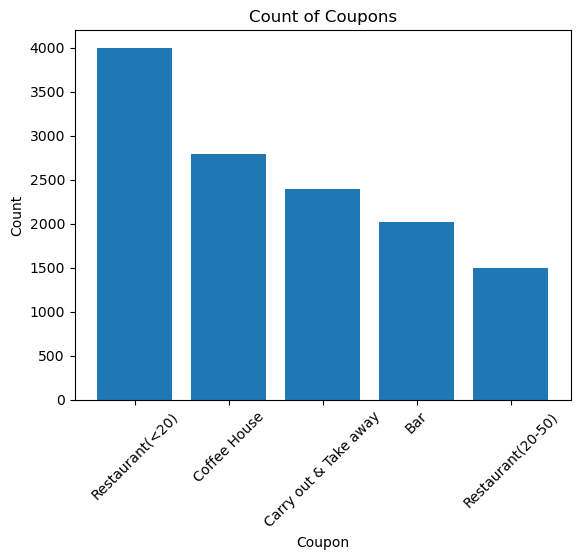

In [31]:
plt.bar(data['coupon'].unique(),data['coupon'].value_counts() )
plt.xlabel("Coupon")
plt.ylabel("Count")
plt.title("Count of Coupons")
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

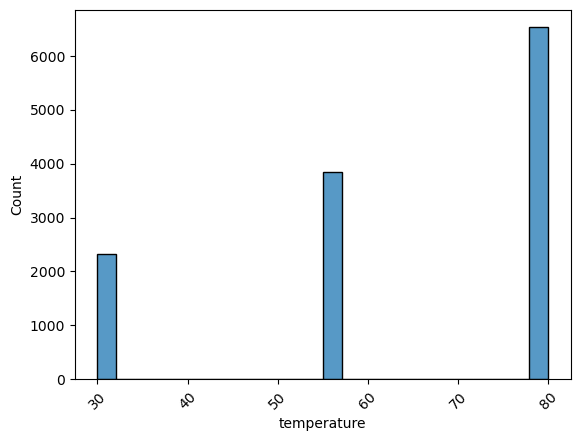

In [33]:
sns.histplot(data, x="temperature")
plt.xticks(rotation=45)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [174]:
data_coupons = data.query('coupon == "Bar"')
data_coupons.sample(10)
#data_coupons.info() # 2017 records

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11691,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,50plus,Married partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,0
11614,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Male,41,Married partner,...,less1,1~3,1~3,less1,1,0,0,0,1,1
11737,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,21,Unmarried partner,...,gt8,4~8,4~8,less1,1,1,0,0,1,1
2288,Work,Alone,Sunny,55,7AM,Bar,1d,Female,41,Single,...,less1,less1,less1,never,1,1,1,0,1,1
716,Work,Alone,Sunny,55,7AM,Bar,1d,Male,36,Unmarried partner,...,never,4~8,gt8,less1,1,1,1,0,1,1
1157,Home,Alone,Sunny,55,6PM,Bar,1d,Female,31,Married partner,...,less1,gt8,4~8,less1,1,0,0,1,0,0
3769,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,4~8,4~8,4~8,1~3,1,0,0,1,0,1
10560,Home,Alone,Rainy,55,6PM,Bar,1d,Male,26,Single,...,1~3,1~3,4~8,4~8,1,1,1,0,1,1
1210,Work,Alone,Sunny,55,7AM,Bar,1d,Female,31,Married partner,...,NaN,4~8,4~8,NaN,1,1,1,0,1,1
11611,Work,Alone,Snowy,30,7AM,Bar,1d,Female,21,Single,...,never,less1,never,never,1,1,1,0,1,0


2. What proportion of bar coupons were accepted?

41.0%

In [53]:
data_coupons['Y'].value_counts() / data_coupons['Y'].count()

Y
0    0.589985
1    0.410015
Name: count, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

* Accept Rate <= 3 bar visits = 37%
* Accept Rate > 3 bar visits = 76.9%

## Conclusion: customers that were shown Bar coupons accepted them +108% (76.9% compared to 37%) for users that go to bars more than 3x/month compared to those that go less frequently. 
#### Note: 21 responses for those that did not provide how often they go to the bar excluded from the analysis

In [56]:
data.groupby("Bar").size()

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5197
dtype: int64

In [77]:
bar_values = ['1~3', 'less1', 'never']
bar_values_greater = ['4~8', 'gt8']
data_less3_bar = data_coupons[data_coupons['Bar'].isin(bar_values)]
data_greater3_bar = data_coupons[data_coupons['Bar'].isin(bar_values_greater)]
data_less3_bar["Bar"].sample(10)
data_greater3_bar["Bar"].sample(10)

3428     4~8
2425     4~8
1777     4~8
4231     4~8
12198    4~8
11498    gt8
8679     4~8
8876     4~8
7760     4~8
11718    gt8
Name: Bar, dtype: object

In [68]:
data_less3_bar['Y'].value_counts() / data_less3_bar['Y'].count()

Y
0    0.629382
1    0.370618
Name: count, dtype: float64

In [78]:
data_greater3_bar['Y'].value_counts() / data_greater3_bar['Y'].count()

Y
1    0.768844
0    0.231156
Name: count, dtype: float64

In [79]:
76.9/37-1

1.0783783783783787

In [80]:
print(data_coupons['Bar'].isna().sum())

21


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


### Some general profiling on Monthly Bar customers > 25 years of age
No nulls in age field, but further profiling shows 20 customers with no "Bar" frequency response, whom will be excluded from this segment for analysis.

See below for further detail and code

In [84]:
data.groupby("age").size()


age
21         2653
26         2559
31         2039
36         1319
41         1093
46          686
50plus     1788
below21     547
dtype: int64

In [124]:
data.groupby(["age", "Bar"]).size()

age      Bar  
21       1~3       660
         4~8       286
         gt8       110
         less1     742
         never     849
26       1~3       605
         4~8       416
         gt8       130
         less1     522
         never     874
31       1~3       431
         4~8       131
         gt8        65
         less1     638
         never     747
36       1~3       196
         4~8        66
         less1     500
         never     535
41       1~3       165
         4~8        44
         less1     510
         never     346
46       1~3        66
         4~8        44
         less1     176
         never     400
50plus   1~3       307
         4~8        89
         gt8        22
         less1     328
         never    1030
below21  1~3        43
         gt8        22
         less1      66
         never     416
dtype: int64

In [102]:
print(data_coupons['age'].isna().sum())

0


In [117]:
bar_values_less_than_monthly = ['less1', 'never']
bar_values_over25 = ['26', '31', '36', '41', '46', '50plus']
data_bar_25over = data_coupons[data_coupons['age'].isin(bar_values_over25)]
data_bar_25over_monthly = data_bar_25over[~data_bar_25over['Bar'].isin(bar_values_less_than_monthly)]
data_bar_25over_monthly.info()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
854,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
857,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
1168,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Male,26,Unmarried partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
1171,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,26,Unmarried partner,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
2380,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
2868,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,31,Married partner,...,NaN,NaN,NaN,NaN,1,1,0,0,1,0
2881,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,36,Married partner,...,1~3,4~8,1~3,1~3,1,1,0,0,1,0
2885,Home,Alone,Sunny,55,6PM,Bar,1d,Female,36,Married partner,...,1~3,4~8,1~3,1~3,1,0,0,1,0,1
2889,Work,Alone,Sunny,55,7AM,Bar,1d,Female,36,Married partner,...,1~3,4~8,1~3,1~3,1,1,1,0,1,1


In [125]:
data_bar_25over_monthly.groupby(["age", "Bar"]).size()

age     Bar
26      1~3    96
        4~8    55
        gt8    18
31      1~3    71
        4~8    16
        gt8     9
36      1~3    28
        4~8    12
41      1~3    28
        4~8     4
46      1~3     9
        4~8     7
50plus  1~3    52
        4~8    12
        gt8     3
dtype: int64

### Some data cleanup on users over 25 and frequent bar monthly shown bar coupons

### Takeaway: 69.5% of users over age 25 and frequent a bar 1+ times monthly accepted a bar coupon

Findings:
* 20 records have no "Bar" value, or is null/NaN.  40% (8 out of 20) have converted to coupon.  All records are users over 25 years
* These 20 records will be dropped from the analysis


In [126]:
data_bar_25over_monthly.query('Bar != Bar')
# 20 records have no "Bar" value, or is null/NaN.  8 out of 20 have converted to coupon.  All are over 25 years

data_bar_25over_monthly_drop_bar_na = data_bar_25over_monthly.dropna(subset = ["Bar"])
data_bar_25over_monthly_drop_bar_na[["Bar", "age"]].sample(20)

data_bar_25over_monthly_drop_bar_na['Y'].value_counts() / data_bar_25over_monthly_drop_bar_na['Y'].count()


Y
1    0.695238
0    0.304762
Name: count, dtype: float64

### Creating All Other comparison segment: Age < 26 and do not frequent a bar monthly shown bar coupon
Create dataframe for OR condition on age and bar frequency

### Takeaway: 33.4% of users that were < 26 years of age and frequent a bar < 1 times per month converted to a bar coupon

### Conclusion: Users > 25 years of age and frequent a bar 1 or more time per month accept bar coupons +108% (69.5% vs. 33.4%) compared to all others that received a bar coupon.  Generally this is a good threshold to show Bar coupons, with some upside to users that frequent bars more often.  

Continuing to send bar coupons to users that frequent bars less often could drive deeper conversion with potential increase in bar frequency over time.  Deeper analysis over time for users that change behavior, get older and frequent bars more often, can provide more insight into velocity, although we may want to assess the impact of alcohol on society


In [135]:
69.5/33.4 -1

1.0808383233532934

In [133]:
bar_values_less_than_monthly = ['less1', 'never']
bar_values_over25 = ['26', '31', '36', '41', '46', '50plus']

#data_bar_25over = data_coupons[data_coupons['age'].isin(bar_values_over25)]
#data_bar_25over_monthly = data_bar_25over[~data_bar_25over['Bar'].isin(bar_values_less_than_monthly)]

data_bar_not_25over = data_coupons[~data_coupons['age'].isin(bar_values_over25)] #504 records
data_bar_not_monthly = data_coupons[data_coupons['Bar'].isin(bar_values_less_than_monthly)] #1400 records

data_bar_not_25over_not_monthly = pd.concat([data_bar_not_25over, data_bar_not_monthly]).drop_duplicates() # 1570 records
data_bar_not_25over_not_monthly['Y'].value_counts() / data_bar_not_25over_not_monthly['Y'].count()

#data_bar_not_25over_not_monthly

Y
0    0.666242
1    0.333758
Name: count, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

### Conclusion: 71% of these users accept a bar coupon offer

In [179]:
#data_coupons.info()
data_coupons.groupby(["occupation"]).size()

occupation
Architecture & Engineering                    27
Arts Design Entertainment Sports & Media     100
Building & Grounds Cleaning & Maintenance      7
Business & Financial                          89
Community & Social Services                   44
Computer & Mathematical                      232
Construction & Extraction                     24
Education&Training&Library                   140
Farming Fishing & Forestry                     9
Food Preparation & Serving Related            48
Healthcare Practitioners & Technical          41
Healthcare Support                            44
Installation Maintenance & Repair             18
Legal                                         34
Life Physical Social Science                  24
Management                                   119
Office & Administrative Support              105
Personal Care & Service                       27
Production Occupations                        18
Protective Service                            27
Retired  

In [210]:
#data_coupons # bar coupons only
bar_values_more_monthly = ['1~3', '4~8', 'gt8']
data_bar_more_monthly = data_coupons[data_coupons['Bar'].isin(bar_values_more_monthly)] #596 records

bar_pass_values_kids = ['Kid(s)']
data_bar_more_monthly_no_kids = data_bar_more_monthly[~data_bar_more_monthly['passanger'].isin(bar_pass_values_kids)] #551 records

bar_occupation_values_fff = ['Farming Fishing & Forestry']
data_bar_mm_no_kids_occ_no_fff = data_bar_more_monthly_no_kids[~data_bar_more_monthly_no_kids['occupation'].isin(bar_occupation_values_fff)]

# data check
data_bar_mm_no_kids_occ_no_fff.groupby(["passanger", "Bar"]).size()

data_bar_mm_no_kids_occ_no_fff['Y'].value_counts() / data_bar_mm_no_kids_occ_no_fff['Y'].count()

passanger  Bar
Alone      1~3    227
           4~8    101
           gt8     28
Friend(s)  1~3     77
           4~8     26
           gt8     17
Partner    1~3     56
           4~8     16
           gt8      3
dtype: int64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



## Analysis of bar coupon conversion for users that go to bars 1+ times/month, no kid passengers, and are not widowed

### Conclusion: 71% of users that were shown a bar coupon that frequent bars 1+ times/month, has no kid passengers, and are not widowed converted.  Bar coupons convert for users that frequent bars regularly and have no children with them.

In [209]:
data_bar_more_monthly_no_kids_not_widowed = data_bar_more_monthly_no_kids[~data_bar_more_monthly_no_kids['maritalStatus'].isin(['Widowed'])]
data_bar_more_monthly_no_kids_not_widowed.groupby(["maritalStatus", "Bar", "passanger"]).size()
data_bar_more_monthly_no_kids_not_widowed['Y'].value_counts() / data_bar_more_monthly_no_kids_not_widowed['Y'].count()

Y
1    0.713249
0    0.286751
Name: count, dtype: float64

## Analysis of bar coupon conversion for users that go to bars 1+ times/month, and are under the age of 30

### Conclusion: 72% of users that were shown a bar coupon that frequent bars 1+ times/month, and under the age of 30 converted



In [216]:
data_bar_more_monthly.groupby(['age']).size()
data_bar_more_monthly_under30 = data_bar_more_monthly[data_bar_more_monthly['age'].isin(['below21','21', '26'])]

# data check
data_bar_more_monthly_under30.groupby(['Bar', 'age']).size()
data_bar_more_monthly_under30['Y'].value_counts() / data_bar_more_monthly_under30['Y'].count()

Y
1    0.721739
0    0.278261
Name: count, dtype: float64

## Analysis of bar coupon conversion for users that go to cheap restaurants > 4 times/month, and incomes < $50K

### Conclusion: 45% of users shown a bar coupon that frequent cheap restaurants 4+ times/month and < $50K in income convert

In [237]:
data_coupons.groupby(['RestaurantLessThan20', 'income']).size()
#'RestaurantLessThan20' # > 4x/month '4~8', 'gt8'
#'income' # < $50k '$Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
data_cheap_rest_4 = data_coupons[data_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])]
# data check
#data_cheap_rest_4.groupby(['RestaurantLessThan20']).size()

data_cheap_rest_4_income_under_50 = data_cheap_rest_4[data_cheap_rest_4['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]
# data check
data_cheap_rest_4_income_under_50.groupby(['RestaurantLessThan20', 'income']).size()
data_cheap_rest_4_income_under_50['Y'].value_counts() / data_cheap_rest_4_income_under_50['Y'].count()

Y
0    0.546512
1    0.453488
Name: count, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesis: Users that frequent bars more than 1x a month are highly correlated with bar coupon conversion and value the product delivered on their drive home

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [257]:
data_cheap_rest_coupons = data.query('coupon == "Restaurant(<20)"') #2786 rows
data_exp_rest_coupons = data.query('coupon == "Restaurant(20-50)"') #1492 rows

# data checks
data_cheap_rest_coupons.groupby(['coupon']).size()
data_exp_rest_coupons.groupby(['coupon']).size()

data_cheap_rest_coupons['Y'].value_counts() / data_cheap_rest_coupons['Y'].count() #70.7% conversion

data_exp_rest_coupons['Y'].value_counts() / data_exp_rest_coupons['Y'].count() #44.1% conversion

Y
0    0.558981
1    0.441019
Name: count, dtype: float64

In [254]:
data_cheap_rest_coupons.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2786.000000,2786.000000,2786.0,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000
mean,64.215721,0.412778,1.0,0.447236,0.111271,0.180187,0.819813,0.707107
std,19.785759,0.492422,0.0,0.497297,0.314523,0.384412,0.384412,0.455171
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Analysis: Does income impact coupon conversion for cheaper vs. expensive restaurants?

## Part 1: Analysis on cheap restaurant coupon performance based on $50k income threshold

### Findings: Income does not seem to affect coupon conversion for cheap restaurants.  Both perform at ~70%, which seems to very good. $50K may not be a good threshold, further analysis recommended for the largest coupon offering: cheaper restaurants.

In [242]:
data_cheap_rest_coupons_income_under_50 = data_cheap_rest_coupons[data_cheap_rest_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]
data_cheap_rest_coupons_income_over_50 = data_cheap_rest_coupons[~data_cheap_rest_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]

# data checks
#data_cheap_rest_coupons_income_under_50.groupby(['income']).size()
#data_cheap_rest_coupons_income_over_50.groupby(['income']).size()
data_cheap_rest_coupons_income_under_50['Y'].value_counts() / data_cheap_rest_coupons_income_under_50['Y'].count() #71.1% conversion
data_cheap_rest_coupons_income_over_50['Y'].value_counts() / data_cheap_rest_coupons_income_over_50['Y'].count() #70.3% conversion


Y
1    0.702744
0    0.297256
Name: count, dtype: float64

## Part 2: Analysis on expensive restaurant coupon performance based on $50k income threshold
### Findings: Income does not seem to affect coupon conversion for expensive restaurants.  Both perform at ~43%.

In [248]:
data_exp_rest_coupons_income_under_50 = data_exp_rest_coupons[data_exp_rest_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]
data_exp_rest_coupons_income_over_50 = data_exp_rest_coupons[~data_exp_rest_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]

# data checks
#data_cheap_rest_coupons_income_under_50.groupby(['income']).size()
#data_cheap_rest_coupons_income_over_50.groupby(['income']).size()
data_exp_rest_coupons_income_under_50['Y'].value_counts() / data_exp_rest_coupons_income_under_50['Y'].count() #43.1% conversion
data_exp_rest_coupons_income_over_50['Y'].value_counts() / data_exp_rest_coupons_income_over_50['Y'].count() #45.2% conversion


Y
0    0.548343
1    0.451657
Name: count, dtype: float64

In [250]:
70/43 -1

0.627906976744186

# Conclusion
* Coupons for lower priced restaurants perform +60% better than more expensive restaurant coupons: 70% vs. 43%.  Based on an income threshold of +/- $50K there was little difference to coupon performance.